In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/drive/MyDrive/book_recommender_system/books.csv'
books = pd.read_csv(file_path)

In [ ]:
books

,author,bookformat,desc,genre,img,isbn,isbn13,link,pages,rating,reviews,title,totalratings
0,Laurence M. Hauptman,Hardcover,Reveals that several hundred thousand Indians ...,"History,Military History,Civil War,American Hi...",https://i.gr-assets.com/images/S/compressed.ph...,002914180X,9.78E+12,https://goodreads.com/book/show/1001053.Betwee...,0,3.52,5,Between Two Fires: American Indians in the Civ...,33
1,"Charlotte Fiell,Emmanuelle Dirix",Paperback,Fashion Sourcebook - 1920s is the first book i...,"Couture,Fashion,Historical,Art,Nonfiction",https://i.gr-assets.com/images/S/compressed.ph...,1906863482,9.78E+12,https://goodreads.com/book/show/10010552-fashi...,576,4.51,6,Fashion Sourcebook 1920s,41
2,Andy Anderson,Paperback,The seminal history and analysis of the Hungar...,"Politics,History",https://i.gr-assets.com/images/S/compressed.ph...,948984147,9.78E+12,https://goodreads.com/book/show/1001077.Hungar...,124,4.15,2,Hungary 56,26
3,Carlotta R. Anderson,Hardcover,"""All-American Anarchist"" chronicles the life a...","Labor,History",https://i.gr-assets.com/images/S/compressed.ph...,814327079,9.78E+12,https://goodreads.com/book/show/1001079.All_Am...,324,3.83,1,All-American Anarchist: Joseph A. Labadie and ...,6
4,Jean Leveille,NaN,"Aujourdâ€™hui, lâ€™oiseau nous invite Ã sa ta...",NaN,https://i.gr-assets.com/images/S/compressed.ph...,2761920813,NaN,https://goodreads.com/book/show/10010880-les-o...,177,4.00,1,Les oiseaux gourmands,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Simon Monk,ebook,Design custom printed circuit boards with EAGL...,NaN,https://i.gr-assets.com/images/S/compressed.ph...,71819266,9.78007E+12,https://goodreads.com/book/show/17320181-make-...,304,4.07,7,Make Your Own PCBs with Eagle: From Schematic ...,56
99996,"Tracie L. Miller-Nobles,Brenda L. Mattison,Ell...",Hardcover,"Redefining tradition in learning accounting. ,...",NaN,https://i.gr-assets.com/images/S/compressed.ph...,133251241,9.78013E+12,https://goodreads.com/book/show/17320260-horng...,1645,4.05,1,Horngren's Financial & Managerial Accounting,38
99997,C. John Miller,Paperback,In these warm reflections on his own growth as...,"Christianity,Evangelism,Christian,Religion,The...",https://i.gr-assets.com/images/S/compressed.ph...,875523919,9.78088E+12,https://goodreads.com/book/show/173203.A_Faith...,160,4.27,20,A Faith Worth Sharing: A Lifetime of Conversat...,122
99998,Albert Marrin,Hardcover,"John Brown is a man of many legacies, from her...","Nonfiction,History,Biography,Military History,...",https://i.gr-assets.com/images/S/compressed.ph...,307981533,9.78031E+12,https://goodreads.com/book/show/17320669-a-vol...,256,3.63,51,A Volcano Beneath the Snow: John Brown's War A...,156


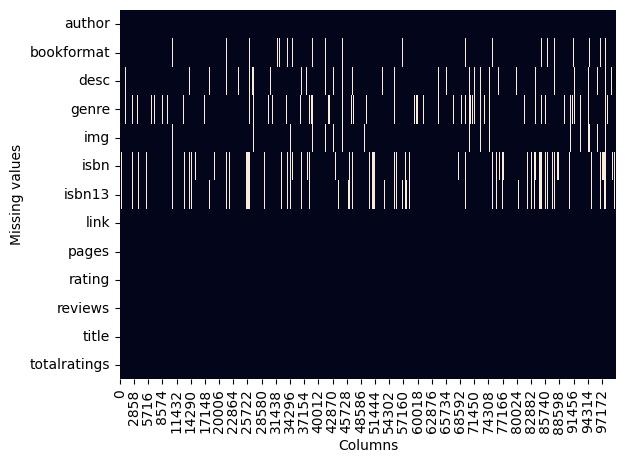

In [ ]:
ax = plt.axes()
sns.heatmap(books.isna().transpose(), cbar=False, ax=ax)

plt.xlabel("Columns")
plt.ylabel("Missing values")

plt.show()

In [ ]:
books["missing_description"] = np.where(books["desc"].isna(), 1, 0)

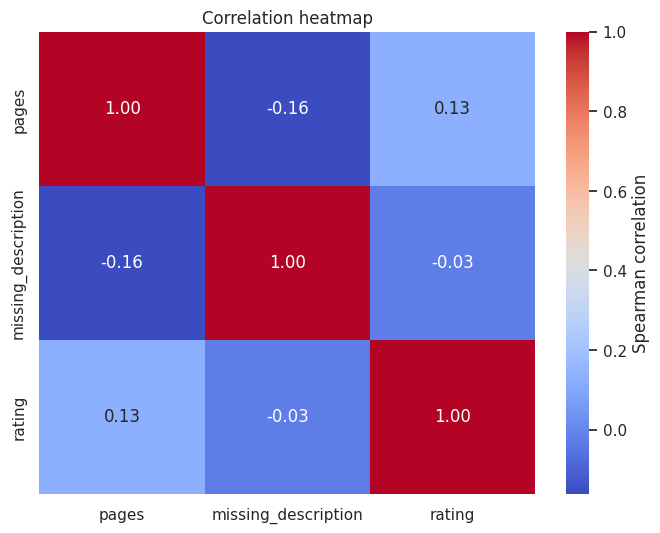

In [ ]:
columns_of_interest = ["pages", "missing_description", "rating"]

correlation_matrix = books[columns_of_interest].corr(method = "spearman")

sns.set_theme(style="white")
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm",
                      cbar_kws={"label": "Spearman correlation"})
heatmap.set_title("Correlation heatmap")
plt.show()

In [ ]:
book_valid = books[~(books["desc"].isna()) &
      ~(books["pages"].isna()) &
      ~(books["rating"].isna())
]

In [ ]:
book_valid

,author,bookformat,desc,genre,img,isbn,isbn13,link,pages,rating,reviews,title,totalratings,missing_description
0,Laurence M. Hauptman,Hardcover,Reveals that several hundred thousand Indians ...,"History,Military History,Civil War,American Hi...",https://i.gr-assets.com/images/S/compressed.ph...,002914180X,9.78E+12,https://goodreads.com/book/show/1001053.Betwee...,0,3.52,5,Between Two Fires: American Indians in the Civ...,33,0
1,"Charlotte Fiell,Emmanuelle Dirix",Paperback,Fashion Sourcebook - 1920s is the first book i...,"Couture,Fashion,Historical,Art,Nonfiction",https://i.gr-assets.com/images/S/compressed.ph...,1906863482,9.78E+12,https://goodreads.com/book/show/10010552-fashi...,576,4.51,6,Fashion Sourcebook 1920s,41,0
2,Andy Anderson,Paperback,The seminal history and analysis of the Hungar...,"Politics,History",https://i.gr-assets.com/images/S/compressed.ph...,948984147,9.78E+12,https://goodreads.com/book/show/1001077.Hungar...,124,4.15,2,Hungary 56,26,0
3,Carlotta R. Anderson,Hardcover,"""All-American Anarchist"" chronicles the life a...","Labor,History",https://i.gr-assets.com/images/S/compressed.ph...,814327079,9.78E+12,https://goodreads.com/book/show/1001079.All_Am...,324,3.83,1,All-American Anarchist: Joseph A. Labadie and ...,6,0
4,Jean Leveille,NaN,"Aujourdâ€™hui, lâ€™oiseau nous invite Ã sa ta...",NaN,https://i.gr-assets.com/images/S/compressed.ph...,2761920813,NaN,https://goodreads.com/book/show/10010880-les-o...,177,4.00,1,Les oiseaux gourmands,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Simon Monk,ebook,Design custom printed circuit boards with EAGL...,NaN,https://i.gr-assets.com/images/S/compressed.ph...,71819266,9.78007E+12,https://goodreads.com/book/show/17320181-make-...,304,4.07,7,Make Your Own PCBs with Eagle: From Schematic ...,56,0
99996,"Tracie L. Miller-Nobles,Brenda L. Mattison,Ell...",Hardcover,"Redefining tradition in learning accounting. ,...",NaN,https://i.gr-assets.com/images/S/compressed.ph...,133251241,9.78013E+12,https://goodreads.com/book/show/17320260-horng...,1645,4.05,1,Horngren's Financial & Managerial Accounting,38,0
99997,C. John Miller,Paperback,In these warm reflections on his own growth as...,"Christianity,Evangelism,Christian,Religion,The...",https://i.gr-assets.com/images/S/compressed.ph...,875523919,9.78088E+12,https://goodreads.com/book/show/173203.A_Faith...,160,4.27,20,A Faith Worth Sharing: A Lifetime of Conversat...,122,0
99998,Albert Marrin,Hardcover,"John Brown is a man of many legacies, from her...","Nonfiction,History,Biography,Military History,...",https://i.gr-assets.com/images/S/compressed.ph...,307981533,9.78031E+12,https://goodreads.com/book/show/17320669-a-vol...,256,3.63,51,A Volcano Beneath the Snow: John Brown's War A...,156,0


In [ ]:
books_missing_description_1 = books[books["missing_description"] == 1]
books_missing_description_1

,author,bookformat,desc,genre,img,isbn,isbn13,link,pages,rating,reviews,title,totalratings,missing_description
30,Luc Milne,Paperback,NaN,"Erotica,Gay Erotica",https://i.gr-assets.com/images/S/compressed.ph...,943595614,9.78E+12,https://goodreads.com/book/show/1001377.The_Mi...,160,3.46,1,The Milk Farm: An Erotic Novel,13,1
36,Wilford C. Wood,Hardcover,NaN,NaN,NaN,NaN,NaN,https://goodreads.com/book/show/10014243-josep...,610,4.29,2,Joseph Smith Begins His Work Book of Mormon 18...,7,1
37,"Ovid,David Malouf,James Michie",Paperback,NaN,"Poetry,Classics,Nonfiction,Philosophy,Romance,...",https://i.gr-assets.com/images/S/compressed.ph...,375761179,9.78E+12,https://goodreads.com/book/show/100142.The_Art...,199,3.81,349,The Art of Love,5154,1
38,Ronald Jackson II,ebook,NaN,NaN,https://i.gr-assets.com/images/S/compressed.ph...,791482375,9.78E+12,https://goodreads.com/book/show/10014315-scrip...,0,4.14,1,"Scripting the Black Masculine Body: Identity, ...",7,1
39,Richard Allen,Paperback,NaN,NaN,https://i.gr-assets.com/images/S/compressed.ph...,915992582,9.78E+12,https://goodreads.com/book/show/1001432.A_Narr...,0,4.50,2,A Narrative of the Proceedings of the Black Pe...,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99964,Eryl Thomas,Paperback,NaN,NaN,NaN,NaN,NaN,https://goodreads.com/book/show/17318982-lland...,24,5.00,0,llandaff Cathedral,1,1
99965,Pitkin Guides,Paperback,NaN,NaN,NaN,NaN,NaN,https://goodreads.com/book/show/17318988-the-b...,24,4.50,0,The battle of hastings and the norman conquest,2,1
99967,st helens church,Paperback,NaN,NaN,NaN,NaN,NaN,https://goodreads.com/book/show/17318995-st-he...,28,3.50,0,st helens church,2,1
99972,st mary Chepstow,NaN,NaN,NaN,NaN,NaN,NaN,https://goodreads.com/book/show/17319016-the-p...,14,5.00,0,the priory and parish church of st mary Chepstow,1,1


In [ ]:
book_valid["genre"].value_counts().reset_index().sort_values("count", ascending=False)

,genre,count
0,Nonfiction,419
1,History,375
2,"Games,Chess",179
3,"Esoterica,Astrology",158
4,"History,Nonfiction",130
...,...,...
25736,"Sequential Art,Comics,Superheroes,Marvel,Seque...",1
25735,"Sequential Art,Comics,Sequential Art,Graphic N...",1
25734,"Sequential Art,Comics,Sequential Art,Graphic N...",1
25733,"Sequential Art,Comics,Sequential Art,Graphic N...",1


In [ ]:
book_valid["words_in_description"] = book_valid["desc"].str.split().str.len()

/tmp/ipython-input-11-4213856102.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_valid["words_in_description"] = book_valid["desc"].str.split().str.len()


In [ ]:
book_valid

,author,bookformat,desc,genre,img,isbn,isbn13,link,pages,rating,reviews,title,totalratings,missing_description,words_in_description
0,Laurence M. Hauptman,Hardcover,Reveals that several hundred thousand Indians ...,"History,Military History,Civil War,American Hi...",https://i.gr-assets.com/images/S/compressed.ph...,002914180X,9.78E+12,https://goodreads.com/book/show/1001053.Betwee...,0,3.52,5,Between Two Fires: American Indians in the Civ...,33,0,31
1,"Charlotte Fiell,Emmanuelle Dirix",Paperback,Fashion Sourcebook - 1920s is the first book i...,"Couture,Fashion,Historical,Art,Nonfiction",https://i.gr-assets.com/images/S/compressed.ph...,1906863482,9.78E+12,https://goodreads.com/book/show/10010552-fashi...,576,4.51,6,Fashion Sourcebook 1920s,41,0,128
2,Andy Anderson,Paperback,The seminal history and analysis of the Hungar...,"Politics,History",https://i.gr-assets.com/images/S/compressed.ph...,948984147,9.78E+12,https://goodreads.com/book/show/1001077.Hungar...,124,4.15,2,Hungary 56,26,0,30
3,Carlotta R. Anderson,Hardcover,"""All-American Anarchist"" chronicles the life a...","Labor,History",https://i.gr-assets.com/images/S/compressed.ph...,814327079,9.78E+12,https://goodreads.com/book/show/1001079.All_Am...,324,3.83,1,All-American Anarchist: Joseph A. Labadie and ...,6,0,164
4,Jean Leveille,NaN,"Aujourdâ€™hui, lâ€™oiseau nous invite Ã sa ta...",NaN,https://i.gr-assets.com/images/S/compressed.ph...,2761920813,NaN,https://goodreads.com/book/show/10010880-les-o...,177,4.00,1,Les oiseaux gourmands,1,0,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Simon Monk,ebook,Design custom printed circuit boards with EAGL...,NaN,https://i.gr-assets.com/images/S/compressed.ph...,71819266,9.78007E+12,https://goodreads.com/book/show/17320181-make-...,304,4.07,7,Make Your Own PCBs with Eagle: From Schematic ...,56,0,192
99996,"Tracie L. Miller-Nobles,Brenda L. Mattison,Ell...",Hardcover,"Redefining tradition in learning accounting. ,...",NaN,https://i.gr-assets.com/images/S/compressed.ph...,133251241,9.78013E+12,https://goodreads.com/book/show/17320260-horng...,1645,4.05,1,Horngren's Financial & Managerial Accounting,38,0,72
99997,C. John Miller,Paperback,In these warm reflections on his own growth as...,"Christianity,Evangelism,Christian,Religion,The...",https://i.gr-assets.com/images/S/compressed.ph...,875523919,9.78088E+12,https://goodreads.com/book/show/173203.A_Faith...,160,4.27,20,A Faith Worth Sharing: A Lifetime of Conversat...,122,0,38
99998,Albert Marrin,Hardcover,"John Brown is a man of many legacies, from her...","Nonfiction,History,Biography,Military History,...",https://i.gr-assets.com/images/S/compressed.ph...,307981533,9.78031E+12,https://goodreads.com/book/show/17320669-a-vol...,256,3.63,51,A Volcano Beneath the Snow: John Brown's War A...,156,0,115


In [ ]:
book_valid.loc[book_valid["words_in_description"].between(1, 6), "desc"]

,desc
409,"Book by Lee, Tanith"
428,Photo Illustrated
487,A compendium of international fairy folklore.
653,"Book by Kelsey, Michael R."
758,Paperback.
...,...
99580,ã‹ã‚ã„ã„é¡”ã—ã¦ãƒ¤ã‚¯ã‚¶ã®è¼ã¨ã€ã¾ã...
99613,Volume III of III.
99694,Autobiographical work.
99696,A modern English Arabic dictionary


In [ ]:
book_valid.loc[book_valid["words_in_description"].between(7, 10), "desc"]

,desc
285,"17 new designs featuring ""Tri-Recs"" and ""Tri-M..."
291,A look at life in the Middle Ages.
462,Uykusuz dergisi Ã§izeri Umut SarÄ±kaya'nÄ±n be...
613,Speelse columns over het Vlaamse literaire leven.
616,Een succesvolle drummer beleeft in Gent divers...
...,...
97898,ÙƒØªØ§Ø¨ Ø¨Ø³ÙŠØ· ÙˆÙ…Ø®ØªØµØ± Ù„ØªÙˆØ¶ÙŠØ­ Ø§...
98625,The Story of a Young Sculptor & his friends
98629,A story of a Photographer & his world
98978,United States History: Preparing for the Advan...


In [ ]:
book_valid.loc[book_valid["words_in_description"].between(11, 20), "desc"]

,desc
65,A city-dwelling wizard who likes his privacy a...
84,"The Blood of Ten Chiefs, tells the story of th..."
132,Amazing gallery of color photography showcases...
152,Why would criminals kidnap a cuddly teddy bear...
179,Volume three in a three volume set that provid...
...,...
99803,A Collection of author's 3 short stories namel...
99821,Fourteen brief and accessible essays by key pl...
99879,Discusses the probable structure and behavior ...
99893,This landmark book explores the ways in which ...


In [ ]:
book_valid_11_words = book_valid[book_valid["words_in_description"]>10]

In [ ]:
book_valid_11_words

,author,bookformat,desc,genre,img,isbn,isbn13,link,pages,rating,reviews,title,totalratings,missing_description,words_in_description
0,Laurence M. Hauptman,Hardcover,Reveals that several hundred thousand Indians ...,"History,Military History,Civil War,American Hi...",https://i.gr-assets.com/images/S/compressed.ph...,002914180X,9.78E+12,https://goodreads.com/book/show/1001053.Betwee...,0,3.52,5,Between Two Fires: American Indians in the Civ...,33,0,31
1,"Charlotte Fiell,Emmanuelle Dirix",Paperback,Fashion Sourcebook - 1920s is the first book i...,"Couture,Fashion,Historical,Art,Nonfiction",https://i.gr-assets.com/images/S/compressed.ph...,1906863482,9.78E+12,https://goodreads.com/book/show/10010552-fashi...,576,4.51,6,Fashion Sourcebook 1920s,41,0,128
2,Andy Anderson,Paperback,The seminal history and analysis of the Hungar...,"Politics,History",https://i.gr-assets.com/images/S/compressed.ph...,948984147,9.78E+12,https://goodreads.com/book/show/1001077.Hungar...,124,4.15,2,Hungary 56,26,0,30
3,Carlotta R. Anderson,Hardcover,"""All-American Anarchist"" chronicles the life a...","Labor,History",https://i.gr-assets.com/images/S/compressed.ph...,814327079,9.78E+12,https://goodreads.com/book/show/1001079.All_Am...,324,3.83,1,All-American Anarchist: Joseph A. Labadie and ...,6,0,164
4,Jean Leveille,NaN,"Aujourdâ€™hui, lâ€™oiseau nous invite Ã sa ta...",NaN,https://i.gr-assets.com/images/S/compressed.ph...,2761920813,NaN,https://goodreads.com/book/show/10010880-les-o...,177,4.00,1,Les oiseaux gourmands,1,0,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Simon Monk,ebook,Design custom printed circuit boards with EAGL...,NaN,https://i.gr-assets.com/images/S/compressed.ph...,71819266,9.78007E+12,https://goodreads.com/book/show/17320181-make-...,304,4.07,7,Make Your Own PCBs with Eagle: From Schematic ...,56,0,192
99996,"Tracie L. Miller-Nobles,Brenda L. Mattison,Ell...",Hardcover,"Redefining tradition in learning accounting. ,...",NaN,https://i.gr-assets.com/images/S/compressed.ph...,133251241,9.78013E+12,https://goodreads.com/book/show/17320260-horng...,1645,4.05,1,Horngren's Financial & Managerial Accounting,38,0,72
99997,C. John Miller,Paperback,In these warm reflections on his own growth as...,"Christianity,Evangelism,Christian,Religion,The...",https://i.gr-assets.com/images/S/compressed.ph...,875523919,9.78088E+12,https://goodreads.com/book/show/173203.A_Faith...,160,4.27,20,A Faith Worth Sharing: A Lifetime of Conversat...,122,0,38
99998,Albert Marrin,Hardcover,"John Brown is a man of many legacies, from her...","Nonfiction,History,Biography,Military History,...",https://i.gr-assets.com/images/S/compressed.ph...,307981533,9.78031E+12,https://goodreads.com/book/show/17320669-a-vol...,256,3.63,51,A Volcano Beneath the Snow: John Brown's War A...,156,0,115


In [ ]:
book_valid_11_words.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91629 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   author                91629 non-null  object 
 1   bookformat            90003 non-null  object 
 2   desc                  91629 non-null  object 
 3   genre                 84127 non-null  object 
 4   img                   90487 non-null  object 
 5   isbn                  79525 non-null  object 
 6   isbn13                82480 non-null  object 
 7   link                  91629 non-null  object 
 8   pages                 91629 non-null  int64  
 9   rating                91629 non-null  float64
 10  reviews               91629 non-null  int64  
 11  title                 91629 non-null  object 
 12  totalratings          91629 non-null  int64  
 13  missing_description   91629 non-null  int64  
 14  words_in_description  91629 non-null  int64  
dtypes: float64(1), int64(5),

In [ ]:
# prompt: fetch me the books which have missing isbn13

book_missing_isbn13 = book_valid_11_words[book_valid_11_words["isbn13"].isna()]

In [ ]:
book_missing_isbn13

,author,bookformat,desc,genre,img,isbn,isbn13,link,pages,rating,reviews,title,totalratings,missing_description,words_in_description
4,Jean Leveille,NaN,"Aujourdâ€™hui, lâ€™oiseau nous invite Ã sa ta...",NaN,https://i.gr-assets.com/images/S/compressed.ph...,2761920813,NaN,https://goodreads.com/book/show/10010880-les-o...,177,4.00,1,Les oiseaux gourmands,1,0,76
65,A.R. Jarvis,ebook,A city-dwelling wizard who likes his privacy a...,"Romance,M M Romance",https://i.gr-assets.com/images/S/compressed.ph...,NaN,NaN,https://goodreads.com/book/show/10015760-the-g...,0,3.67,2,The Glass Dog,15,0,18
67,Eliezer Yudkowsky,ebook,Harry Potter and the Methods of Rationality is...,"Fantasy,Fiction,Fan Fiction,Philosophy,Science...",https://i.gr-assets.com/images/S/compressed.ph...,NaN,NaN,https://goodreads.com/book/show/10016013-harry...,2184,4.40,1414,Harry Potter and the Methods of Rationality,14293,0,60
91,Ward Rutherford,Paperback,The Celts have been described as the 'founders...,"Nonfiction,Fantasy,Mythology,History,Religion,...",https://i.gr-assets.com/images/S/compressed.ph...,NaN,NaN,https://goodreads.com/book/show/1001860.Celtic...,240,3.31,2,Celtic Lore,32,0,130
99,Andy Hoare,Mass Market Paperback,Rogue trader patriarch Lucian Gerrit and his f...,"40k,Science Fiction,Fiction",https://i.gr-assets.com/images/S/compressed.ph...,NaN,NaN,https://goodreads.com/book/show/1001948.Star_o...,256,3.28,3,Star of Damocles,102,0,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99978,Mi-Ri Hwang,NaN,"From HMR Scans:,No matter where you are I can ...","Manga,Manhwa,Sequential Art,Manga,Manga,Shojo,...",https://i.gr-assets.com/images/S/compressed.ph...,NaN,NaN,https://goodreads.com/book/show/17319133-say-s...,0,3.54,1,Say say say (#1),28,0,59
99979,Jaqueline E. Pearson,Wattpad,"My brother disappeared when I was eight, after...","Paranormal,Vampires,Fantasy,Paranormal",https://i.gr-assets.com/images/S/compressed.ph...,NaN,NaN,https://goodreads.com/book/show/17319136-i-was...,0,3.82,16,I was Sold to My Dead Brother's Best Friend,154,0,81
99985,Aphrodite Hunt,Kindle Edition,"Mariel Honeycutt is a proud, plus-sized Ivy Le...","Erotica,BDSM,Romance",https://i.gr-assets.com/images/S/compressed.ph...,NaN,NaN,https://goodreads.com/book/show/17319443-open-...,74,2.77,6,Open Your Curvy Legs for Me,43,0,130
99988,C.T. Khanolkar,Paperback,A Novella that brings out a story of a person ...,NaN,https://i.gr-assets.com/images/S/compressed.ph...,NaN,NaN,https://goodreads.com/book/show/17319699,90,3.14,3,à¤…à¤œà¤—à¤°,14,0,15


In [ ]:
book_valid_11_words_no_missing_isbn13 = book_valid_11_words[~(book_valid_11_words["isbn"].isna())]
book_valid_11_words_no_missing_isbn13


,author,bookformat,desc,genre,img,isbn,isbn13,link,pages,rating,reviews,title,totalratings,missing_description,words_in_description
0,Laurence M. Hauptman,Hardcover,Reveals that several hundred thousand Indians ...,"History,Military History,Civil War,American Hi...",https://i.gr-assets.com/images/S/compressed.ph...,002914180X,9.78E+12,https://goodreads.com/book/show/1001053.Betwee...,0,3.52,5,Between Two Fires: American Indians in the Civ...,33,0,31
1,"Charlotte Fiell,Emmanuelle Dirix",Paperback,Fashion Sourcebook - 1920s is the first book i...,"Couture,Fashion,Historical,Art,Nonfiction",https://i.gr-assets.com/images/S/compressed.ph...,1906863482,9.78E+12,https://goodreads.com/book/show/10010552-fashi...,576,4.51,6,Fashion Sourcebook 1920s,41,0,128
2,Andy Anderson,Paperback,The seminal history and analysis of the Hungar...,"Politics,History",https://i.gr-assets.com/images/S/compressed.ph...,948984147,9.78E+12,https://goodreads.com/book/show/1001077.Hungar...,124,4.15,2,Hungary 56,26,0,30
3,Carlotta R. Anderson,Hardcover,"""All-American Anarchist"" chronicles the life a...","Labor,History",https://i.gr-assets.com/images/S/compressed.ph...,814327079,9.78E+12,https://goodreads.com/book/show/1001079.All_Am...,324,3.83,1,All-American Anarchist: Joseph A. Labadie and ...,6,0,164
4,Jean Leveille,NaN,"Aujourdâ€™hui, lâ€™oiseau nous invite Ã sa ta...",NaN,https://i.gr-assets.com/images/S/compressed.ph...,2761920813,NaN,https://goodreads.com/book/show/10010880-les-o...,177,4.00,1,Les oiseaux gourmands,1,0,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Simon Monk,ebook,Design custom printed circuit boards with EAGL...,NaN,https://i.gr-assets.com/images/S/compressed.ph...,71819266,9.78007E+12,https://goodreads.com/book/show/17320181-make-...,304,4.07,7,Make Your Own PCBs with Eagle: From Schematic ...,56,0,192
99996,"Tracie L. Miller-Nobles,Brenda L. Mattison,Ell...",Hardcover,"Redefining tradition in learning accounting. ,...",NaN,https://i.gr-assets.com/images/S/compressed.ph...,133251241,9.78013E+12,https://goodreads.com/book/show/17320260-horng...,1645,4.05,1,Horngren's Financial & Managerial Accounting,38,0,72
99997,C. John Miller,Paperback,In these warm reflections on his own growth as...,"Christianity,Evangelism,Christian,Religion,The...",https://i.gr-assets.com/images/S/compressed.ph...,875523919,9.78088E+12,https://goodreads.com/book/show/173203.A_Faith...,160,4.27,20,A Faith Worth Sharing: A Lifetime of Conversat...,122,0,38
99998,Albert Marrin,Hardcover,"John Brown is a man of many legacies, from her...","Nonfiction,History,Biography,Military History,...",https://i.gr-assets.com/images/S/compressed.ph...,307981533,9.78031E+12,https://goodreads.com/book/show/17320669-a-vol...,256,3.63,51,A Volcano Beneath the Snow: John Brown's War A...,156,0,115


In [ ]:
book_valid_11_words_no_missing_isbn13["tagged_description"] = book_valid_11_words_no_missing_isbn13[["isbn", "desc"]].astype(str).agg(" ".join, axis=1)

/tmp/ipython-input-22-3255432048.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_valid_11_words_no_missing_isbn13["tagged_description"] = book_valid_11_words_no_missing_isbn13[["isbn", "desc"]].astype(str).agg(" ".join, axis=1)


In [ ]:
book_valid_11_words_no_missing_isbn13

,author,bookformat,desc,genre,img,isbn,isbn13,link,pages,rating,reviews,title,totalratings,missing_description,words_in_description,tagged_description
0,Laurence M. Hauptman,Hardcover,Reveals that several hundred thousand Indians ...,"History,Military History,Civil War,American Hi...",https://i.gr-assets.com/images/S/compressed.ph...,002914180X,9.78E+12,https://goodreads.com/book/show/1001053.Betwee...,0,3.52,5,Between Two Fires: American Indians in the Civ...,33,0,31,002914180X Reveals that several hundred thousa...
1,"Charlotte Fiell,Emmanuelle Dirix",Paperback,Fashion Sourcebook - 1920s is the first book i...,"Couture,Fashion,Historical,Art,Nonfiction",https://i.gr-assets.com/images/S/compressed.ph...,1906863482,9.78E+12,https://goodreads.com/book/show/10010552-fashi...,576,4.51,6,Fashion Sourcebook 1920s,41,0,128,1906863482 Fashion Sourcebook - 1920s is the f...
2,Andy Anderson,Paperback,The seminal history and analysis of the Hungar...,"Politics,History",https://i.gr-assets.com/images/S/compressed.ph...,948984147,9.78E+12,https://goodreads.com/book/show/1001077.Hungar...,124,4.15,2,Hungary 56,26,0,30,948984147 The seminal history and analysis of ...
3,Carlotta R. Anderson,Hardcover,"""All-American Anarchist"" chronicles the life a...","Labor,History",https://i.gr-assets.com/images/S/compressed.ph...,814327079,9.78E+12,https://goodreads.com/book/show/1001079.All_Am...,324,3.83,1,All-American Anarchist: Joseph A. Labadie and ...,6,0,164,"814327079 ""All-American Anarchist"" chronicles ..."
4,Jean Leveille,NaN,"Aujourdâ€™hui, lâ€™oiseau nous invite Ã sa ta...",NaN,https://i.gr-assets.com/images/S/compressed.ph...,2761920813,NaN,https://goodreads.com/book/show/10010880-les-o...,177,4.00,1,Les oiseaux gourmands,1,0,76,"2761920813 Aujourdâ€™hui, lâ€™oiseau nous invi..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Simon Monk,ebook,Design custom printed circuit boards with EAGL...,NaN,https://i.gr-assets.com/images/S/compressed.ph...,71819266,9.78007E+12,https://goodreads.com/book/show/17320181-make-...,304,4.07,7,Make Your Own PCBs with Eagle: From Schematic ...,56,0,192,71819266 Design custom printed circuit boards ...
99996,"Tracie L. Miller-Nobles,Brenda L. Mattison,Ell...",Hardcover,"Redefining tradition in learning accounting. ,...",NaN,https://i.gr-assets.com/images/S/compressed.ph...,133251241,9.78013E+12,https://goodreads.com/book/show/17320260-horng...,1645,4.05,1,Horngren's Financial & Managerial Accounting,38,0,72,133251241 Redefining tradition in learning acc...
99997,C. John Miller,Paperback,In these warm reflections on his own growth as...,"Christianity,Evangelism,Christian,Religion,The...",https://i.gr-assets.com/images/S/compressed.ph...,875523919,9.78088E+12,https://goodreads.com/book/show/173203.A_Faith...,160,4.27,20,A Faith Worth Sharing: A Lifetime of Conversat...,122,0,38,875523919 In these warm reflections on his own...
99998,Albert Marrin,Hardcover,"John Brown is a man of many legacies, from her...","Nonfiction,History,Biography,Military History,...",https://i.gr-assets.com/images/S/compressed.ph...,307981533,9.78031E+12,https://goodreads.com/book/show/17320669-a-vol...,256,3.63,51,A Volcano Beneath the Snow: John Brown's War A...,156,0,115,307981533 John Brown is a man of many legacies...


In [ ]:
book_valid_11_words_no_missing_isbn13['isbn']

,isbn
0,002914180X
1,1906863482
2,948984147
3,814327079
4,2761920813
...,...
99995,71819266
99996,133251241
99997,875523919
99998,307981533


In [ ]:
len(book_valid_11_words_no_missing_isbn13['isbn'].unique())

79525

In [ ]:
df = book_valid_11_words_no_missing_isbn13

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79525 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   author                79525 non-null  object 
 1   bookformat            78684 non-null  object 
 2   desc                  79525 non-null  object 
 3   genre                 73026 non-null  object 
 4   img                   78690 non-null  object 
 5   isbn                  79525 non-null  object 
 6   isbn13                78474 non-null  object 
 7   link                  79525 non-null  object 
 8   pages                 79525 non-null  int64  
 9   rating                79525 non-null  float64
 10  reviews               79525 non-null  int64  
 11  title                 79525 non-null  object 
 12  totalratings          79525 non-null  int64  
 13  missing_description   79525 non-null  int64  
 14  words_in_description  79525 non-null  int64  
 15  tagged_description    79

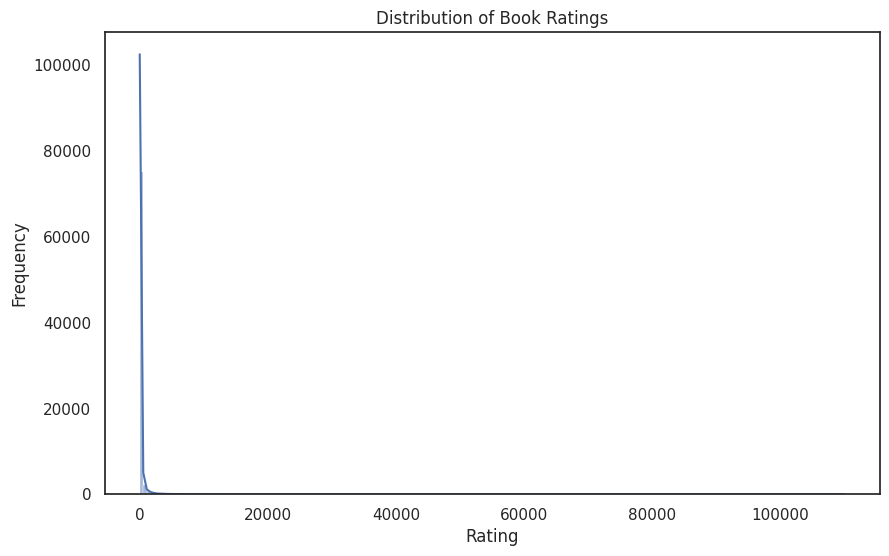

In [ ]:
# prompt: plot distribution of reviews

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.histplot(df['reviews'], bins=200, kde=True)
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [ ]:
num_books_zero_reviews = df[df["reviews"] <= 50].shape[0]
print(f"Number of books with less reviews: {num_books_zero_reviews}")

Number of books with less reviews: 54827


In [ ]:
# prompt: remove books with reviews less than 50

df = df[df['reviews'] >= 50]

In [ ]:
df

,author,bookformat,desc,genre,img,isbn,isbn13,link,pages,rating,reviews,title,totalratings,missing_description,words_in_description,tagged_description
13,Richard Layard,Paperback,There is a paradox at the heart of our lives. ...,"Psychology,Nonfiction,Economics,Science,Philos...",https://i.gr-assets.com/images/S/compressed.ph...,143037013,9.78E+12,https://goodreads.com/book/show/100120.Happiness,320,3.73,85,Happiness: Lessons from a New Science,924,0,199,143037013 There is a paradox at the heart of o...
17,Helen Fremont,Paperback,"""To this day, I don't even know what my mother...","Autobiography,Memoir,Nonfiction,World War II,H...",https://i.gr-assets.com/images/S/compressed.ph...,385333706,9.78E+12,https://goodreads.com/book/show/1001282.After_...,368,4.00,328,After Long Silence,2898,0,236,"385333706 ""To this day, I don't even know what..."
21,Christopher Morley,Paperback,"Roger Mifflin is part pixie, part sage, part n...","Fiction,Writing,Books About Books,Classics,Hum...",https://i.gr-assets.com/images/S/compressed.ph...,1414270658,9.78E+12,https://goodreads.com/book/show/1001312.Parnas...,152,4.03,1214,Parnassus on Wheels,6107,0,121,"1414270658 Roger Mifflin is part pixie, part s..."
24,Robert J. Shiller,Paperback,As Robert Shillerâ€™s new 2009 preface to his ...,"Economics,Economics,Finance,Business,Nonfictio...",https://i.gr-assets.com/images/S/compressed.ph...,767923634,9.78E+12,https://goodreads.com/book/show/100132.Irratio...,304,3.98,275,Irrational Exuberance,7019,0,230,767923634 As Robert Shillerâ€™s new 2009 prefa...
41,Joseph Staten,Paperback,"This is how it began...,It is the year 2524. H...","Science Fiction,Fiction,Games,Video Games,Spor...",https://i.gr-assets.com/images/S/compressed.ph...,765315696,9.78E+12,https://goodreads.com/book/show/1001442.Halo,396,3.98,271,Halo: Contact Harvest,8033,0,116,"765315696 This is how it began...,It is the ye..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99987,Melissa Lucashenko,Paperback,A darkly funny novel of romantic love and cult...,"Fiction,Cultural,Australia,Literary Fiction,Co...",https://i.gr-assets.com/images/S/compressed.ph...,702239194,9.7807E+12,https://goodreads.com/book/show/17319691-mullu...,296,3.93,164,Mullumbimby,1257,0,131,702239194 A darkly funny novel of romantic lov...
99992,John Lescroart,Paperback,"""People"" magazine crowns him ""a master."" ""The ...","Mystery,Fiction,Thriller,Legal Thriller,Thrill...",https://i.gr-assets.com/images/S/compressed.ph...,451207645,9.78045E+12,https://goodreads.com/book/show/17319.The_Oath,468,4.03,156,The Oath,3413,0,271,"451207645 ""People"" magazine crowns him ""a mast..."
99993,Philip Hoare,Paperback,"A startling new book, his most personal to dat...","Nonfiction,Environment,Nature,Travel,Science,A...",https://i.gr-assets.com/images/S/compressed.ph...,7412118,9.78001E+12,https://goodreads.com/book/show/17320067-the-s...,350,3.77,74,The Sea Inside,497,0,183,"7412118 A startling new book, his most persona..."
99994,Sarah Lean,Paperback,Sometimes when things are broken you can't fix...,"Animals,Childrens,Middle Grade,Animals,Horses,...",https://i.gr-assets.com/images/S/compressed.ph...,7455054,9.78001E+12,https://goodreads.com/book/show/17320079-a-hor...,288,3.97,94,A Horse for Angel,535,0,93,7455054 Sometimes when things are broken you c...


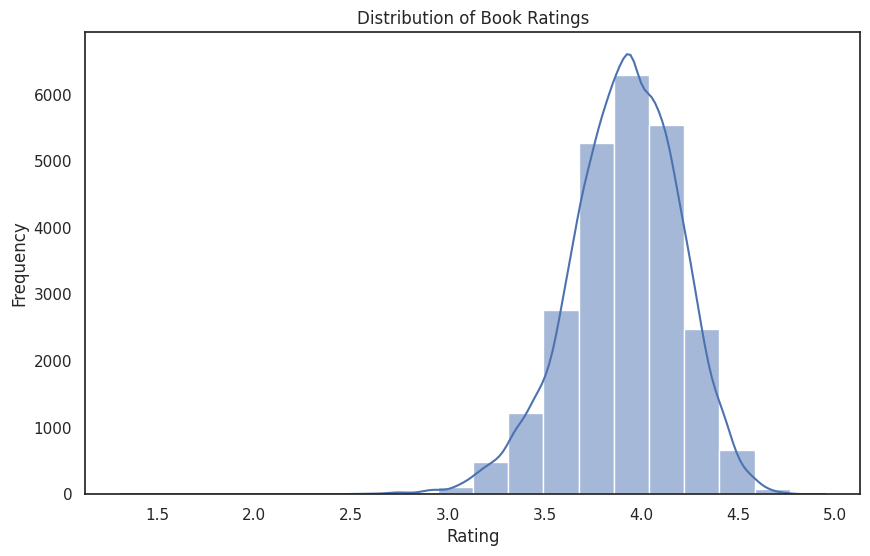

In [ ]:
# prompt: plot distribution of ratings

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=20, kde=True)
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df = df[df['rating'] >= 3.5]
df

,author,bookformat,desc,genre,img,isbn,isbn13,link,pages,rating,reviews,title,totalratings,missing_description,words_in_description,tagged_description
13,Richard Layard,Paperback,There is a paradox at the heart of our lives. ...,"Psychology,Nonfiction,Economics,Science,Philos...",https://i.gr-assets.com/images/S/compressed.ph...,143037013,9.78E+12,https://goodreads.com/book/show/100120.Happiness,320,3.73,85,Happiness: Lessons from a New Science,924,0,199,143037013 There is a paradox at the heart of o...
17,Helen Fremont,Paperback,"""To this day, I don't even know what my mother...","Autobiography,Memoir,Nonfiction,World War II,H...",https://i.gr-assets.com/images/S/compressed.ph...,385333706,9.78E+12,https://goodreads.com/book/show/1001282.After_...,368,4.00,328,After Long Silence,2898,0,236,"385333706 ""To this day, I don't even know what..."
21,Christopher Morley,Paperback,"Roger Mifflin is part pixie, part sage, part n...","Fiction,Writing,Books About Books,Classics,Hum...",https://i.gr-assets.com/images/S/compressed.ph...,1414270658,9.78E+12,https://goodreads.com/book/show/1001312.Parnas...,152,4.03,1214,Parnassus on Wheels,6107,0,121,"1414270658 Roger Mifflin is part pixie, part s..."
24,Robert J. Shiller,Paperback,As Robert Shillerâ€™s new 2009 preface to his ...,"Economics,Economics,Finance,Business,Nonfictio...",https://i.gr-assets.com/images/S/compressed.ph...,767923634,9.78E+12,https://goodreads.com/book/show/100132.Irratio...,304,3.98,275,Irrational Exuberance,7019,0,230,767923634 As Robert Shillerâ€™s new 2009 prefa...
41,Joseph Staten,Paperback,"This is how it began...,It is the year 2524. H...","Science Fiction,Fiction,Games,Video Games,Spor...",https://i.gr-assets.com/images/S/compressed.ph...,765315696,9.78E+12,https://goodreads.com/book/show/1001442.Halo,396,3.98,271,Halo: Contact Harvest,8033,0,116,"765315696 This is how it began...,It is the ye..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99987,Melissa Lucashenko,Paperback,A darkly funny novel of romantic love and cult...,"Fiction,Cultural,Australia,Literary Fiction,Co...",https://i.gr-assets.com/images/S/compressed.ph...,702239194,9.7807E+12,https://goodreads.com/book/show/17319691-mullu...,296,3.93,164,Mullumbimby,1257,0,131,702239194 A darkly funny novel of romantic lov...
99992,John Lescroart,Paperback,"""People"" magazine crowns him ""a master."" ""The ...","Mystery,Fiction,Thriller,Legal Thriller,Thrill...",https://i.gr-assets.com/images/S/compressed.ph...,451207645,9.78045E+12,https://goodreads.com/book/show/17319.The_Oath,468,4.03,156,The Oath,3413,0,271,"451207645 ""People"" magazine crowns him ""a mast..."
99993,Philip Hoare,Paperback,"A startling new book, his most personal to dat...","Nonfiction,Environment,Nature,Travel,Science,A...",https://i.gr-assets.com/images/S/compressed.ph...,7412118,9.78001E+12,https://goodreads.com/book/show/17320067-the-s...,350,3.77,74,The Sea Inside,497,0,183,"7412118 A startling new book, his most persona..."
99994,Sarah Lean,Paperback,Sometimes when things are broken you can't fix...,"Animals,Childrens,Middle Grade,Animals,Horses,...",https://i.gr-assets.com/images/S/compressed.ph...,7455054,9.78001E+12,https://goodreads.com/book/show/17320079-a-hor...,288,3.97,94,A Horse for Angel,535,0,93,7455054 Sometimes when things are broken you c...


In [ ]:
df.drop(["bookformat", "missing_description", "words_in_description", "isbn13"], axis=1).to_csv("books_cleaned.csv", index = False)
